In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [44]:
stock="AAPL"
data=yf.download(tickers=stock,period='10y',prepost=True,actions=True)
print(data.head)

[*********************100%%**********************]  1 of 1 completed

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-21   19.321072   19.645357   19.300714   19.609644   17.191607   
2014-01-22   19.675358   19.903214   19.564644   19.696787   17.268002   
2014-01-23   19.640715   19.875000   19.457500   19.863571   17.414225   
2014-01-24   19.785713   19.843571   19.455357   19.502501   17.097679   
2014-01-27   19.645357   19.814285   19.491072   19.660713   17.236382   
...                ...         ...         ...         ...         ...   
2024-01-12  186.059998  186.740005  185.190002  185.919998  185.919998   
2024-01-16  182.160004  184.259995  180.929993  183.630005  183.630005   
2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   

       

In [45]:
data["SMA"]=data.Close.rolling(100).mean()
data.isnull().sum()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA
Date,,,,,,,,,
2014-01-21,19.321072,19.645357,19.300714,19.609644,17.191607,328526800,0.0,0.0,NaN
2014-01-22,19.675358,19.903214,19.564644,19.696787,17.268002,379985200,0.0,0.0,NaN
2014-01-23,19.640715,19.875000,19.457500,19.863571,17.414225,403239200,0.0,0.0,NaN
2014-01-24,19.785713,19.843571,19.455357,19.502501,17.097679,429354800,0.0,0.0,NaN
2014-01-27,19.645357,19.814285,19.491072,19.660713,17.236382,554878800,0.0,0.0,NaN


In [46]:
def calculate_sma(data,window_size):
    sma_values=[]
    n=len(data)
    for i in range(n-window_size+1):
        window=data[i:i+window_size]
        sma=sum(window)/window_size
        sma_values.append(sma)
    sma_values=[None]*(window_size-1)+sma_values
    return sma_values

data["MySMA"]=calculate_sma(data.Close,100)
    

In [47]:
data.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-01-21   19.321072   19.645357   19.300714   19.609644   17.191607   
2014-01-22   19.675358   19.903214   19.564644   19.696787   17.268002   
2014-01-23   19.640715   19.875000   19.457500   19.863571   17.414225   
2014-01-24   19.785713   19.843571   19.455357   19.502501   17.097679   
2014-01-27   19.645357   19.814285   19.491072   19.660713   17.236382   
...                ...         ...         ...         ...         ...   
2024-01-12  186.059998  186.740005  185.190002  185.919998  185.919998   
2024-01-16  182.160004  184.259995  180.929993  183.630005  183.630005   
2024-01-17  181.270004  182.929993  180.300003  182.679993  182.679993   
2024-01-18  186.089996  189.139999  185.830002  188.630005  188.630005   
2024-01-19  189.330002  191.949997  188.820007  191.559998  191.559998   

       

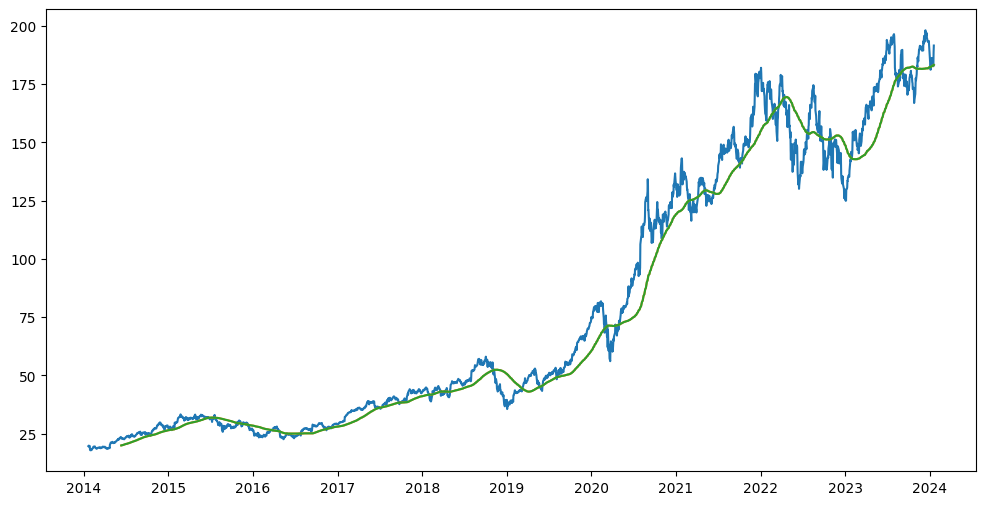

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(data.SMA)
plt.plot(data.MySMA)
plt.show()

In [49]:
def calculate_exponential_smoothing(data,span):
    n=len(data)
    alpha=2/(span+1)
    smoothed_values=[data[0]]

    for i in range(1,n):
        smooth_val=alpha*data[i] +(1-alpha)*smoothed_values[-1]
        smoothed_values.append(smooth_val)
    return smoothed_values

data["MyEMA"]=calculate_exponential_smoothing(data.Close,span=10)
data.head

data["EMA"]=data.Close.ewm(span=9, adjust=False).mean()
data.head()


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,MySMA,MyEMA,EMA
Date,,,,,,,,,,,,
2014-01-21,19.321072,19.645357,19.300714,19.609644,17.191607,328526800,0.0,0.0,NaN,NaN,19.609644,19.609644
2014-01-22,19.675358,19.903214,19.564644,19.696787,17.268002,379985200,0.0,0.0,NaN,NaN,19.625488,19.627073
2014-01-23,19.640715,19.875000,19.457500,19.863571,17.414225,403239200,0.0,0.0,NaN,NaN,19.668776,19.674372
2014-01-24,19.785713,19.843571,19.455357,19.502501,17.097679,429354800,0.0,0.0,NaN,NaN,19.638544,19.639998
2014-01-27,19.645357,19.814285,19.491072,19.660713,17.236382,554878800,0.0,0.0,NaN,NaN,19.642575,19.644141


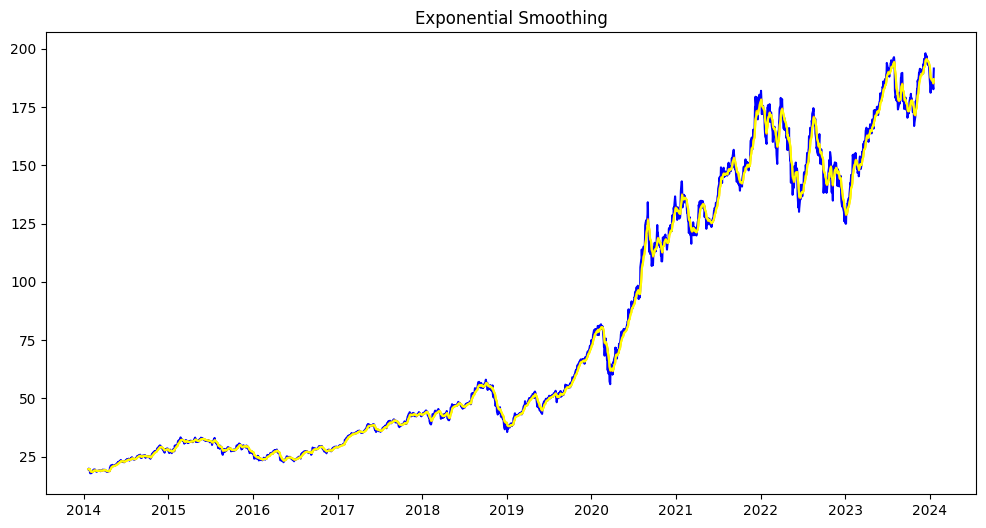

In [50]:
plt.figure(figsize=(12,6))
plt.plot(data.Close,label="Close Price",color="blue")
plt.plot(data.EMA,label=f'Smoothed (alpha={alpha})',color="orange")
plt.plot(data.MyEMA,label=f'Smoothed (alpha={alpha})',color="yellow")
plt.title("Exponential Smoothing")
plt.show()

In [51]:
def calculate_double_exponential_moving_average(data,span_short):
    dema_values=[]
    
    ema_1=calculate_exponential_smoothing(data,span_short)
    ema_2=calculate_exponential_smoothing(ema_1,span_short)


    dema_values=[2*ema_1[i]-ema_2[i] for i in range(len(data))]

    return dema_values    

In [52]:
data["MyDEMA"]=calculate_double_exponential_moving_average(data.Close,span_short=10)

In [53]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,MySMA,MyEMA,EMA,MyDEMA
Date,,,,,,,,,,,,,
2014-01-21,19.321072,19.645357,19.300714,19.609644,17.191607,328526800,0.0,0.0,NaN,NaN,19.609644,19.609644,19.609644
2014-01-22,19.675358,19.903214,19.564644,19.696787,17.268002,379985200,0.0,0.0,NaN,NaN,19.625488,19.627073,19.638452
2014-01-23,19.640715,19.875000,19.457500,19.863571,17.414225,403239200,0.0,0.0,NaN,NaN,19.668776,19.674372,19.714800
2014-01-24,19.785713,19.843571,19.455357,19.502501,17.097679,429354800,0.0,0.0,NaN,NaN,19.638544,19.639998,19.651465
2014-01-27,19.645357,19.814285,19.491072,19.660713,17.236382,554878800,0.0,0.0,NaN,NaN,19.642575,19.644141,19.656444


In [54]:
ema_short=data.Close.ewm(span=10,adjust=False).mean()
ema_short

Date
2014-01-21     19.609644
2014-01-22     19.625488
2014-01-23     19.668776
2014-01-24     19.638544
2014-01-27     19.642575
                 ...    
2024-01-12    186.488701
2024-01-16    185.968938
2024-01-17    185.370948
2024-01-18    185.963504
2024-01-19    186.981048
Name: Close, Length: 2517, dtype: float64

In [55]:
def calculate_dema(data,span):
    ema_short=data.Close.ewm(span=span,adjust=False).mean()
    ema_long=ema_short.ewm(span=span,adjust=False).mean()

    dema_values=2*ema_short-ema_long
    #dema_values=2*dema-dema.ewm(span=span_long,adjust=False).mean()
    return dema_values
data["DEMA"]=calculate_dema(data,span=10)
data.head(10)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,MySMA,MyEMA,EMA,MyDEMA,DEMA
Date,,,,,,,,,,,,,,
2014-01-21,19.321072,19.645357,19.300714,19.609644,17.191607,328526800,0.0,0.0,NaN,NaN,19.609644,19.609644,19.609644,19.609644
2014-01-22,19.675358,19.903214,19.564644,19.696787,17.268002,379985200,0.0,0.0,NaN,NaN,19.625488,19.627073,19.638452,19.638452
2014-01-23,19.640715,19.875000,19.457500,19.863571,17.414225,403239200,0.0,0.0,NaN,NaN,19.668776,19.674372,19.714800,19.714800
2014-01-24,19.785713,19.843571,19.455357,19.502501,17.097679,429354800,0.0,0.0,NaN,NaN,19.638544,19.639998,19.651465,19.651465
2014-01-27,19.645357,19.814285,19.491072,19.660713,17.236382,554878800,0.0,0.0,NaN,NaN,19.642575,19.644141,19.656444,19.656444
2014-01-28,18.170000,18.392857,17.931070,18.089287,15.858727,1065523200,0.0,0.0,NaN,NaN,19.360159,19.333170,19.140439,19.140439
2014-01-29,17.998215,18.120358,17.807858,17.883928,15.678692,502810000,0.0,0.0,NaN,NaN,19.091753,19.043322,18.692378,18.692378
2014-01-30,17.947857,18.089287,17.739286,17.849285,15.648326,678501600,0.0,0.0,NaN,NaN,18.865850,18.804514,18.354258,18.354258
2014-01-31,17.684999,17.911785,17.626785,17.878571,15.673992,464797200,0.0,0.0,NaN,NaN,18.686345,18.619326,18.120902,18.120902


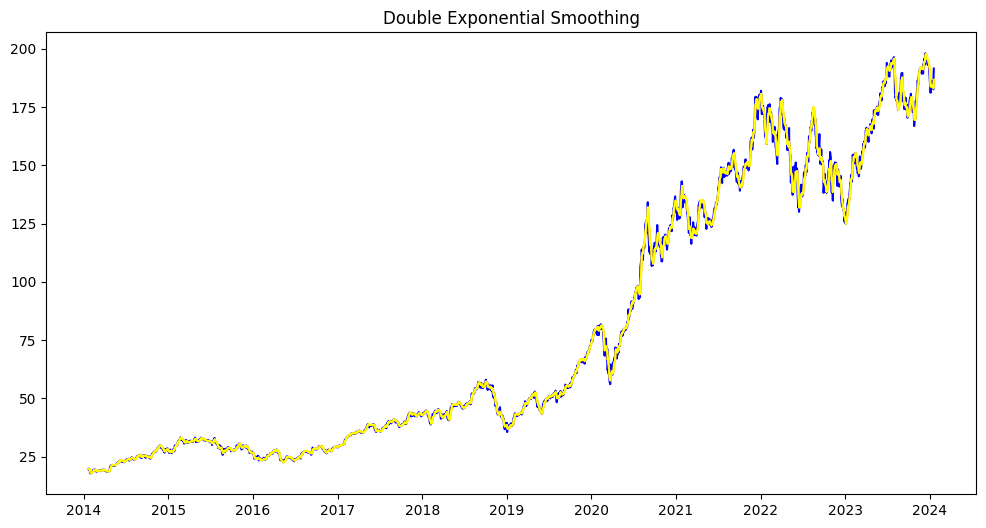

In [56]:
plt.figure(figsize=(12,6))
plt.plot(data.Close,label="Close Price",color="blue")
plt.plot(data.DEMA,color="orange")
plt.plot(data.MyDEMA,label=f'Smoothed (alpha={alpha})',color="yellow")
plt.title("Double Exponential Smoothing")
plt.show()